In [ ]:
pip install xgboost --user

Note: you may need to restart the kernel to use updated packages.


# Importing libraries

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as graph
import matplotlib.pyplot as plt
from sklearn import preprocessing
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from imblearn.combine import SMOTETomek
from collections import Counter
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Loading Dataset into Python eviroment

In [ ]:
#Loading Dataset
df= pd.read_csv("C:/Users/Austin/Downloads/ai4i2020.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [ ]:
print(df.columns)

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')


# Creating the Columns encoded_values and encoded_names

In [ ]:
encoded_values = []
for i in range(len(df)):
    if df['TWF'][i] == 1:
        encoded_values.append(1)
    elif df['HDF'][i] == 1:
        encoded_values.append(2)
    elif df['PWF'][i] == 1:
        encoded_values.append(3)
    elif df['OSF'][i] == 1:
        encoded_values.append(4)
    elif df['RNF'][i] == 1:
        encoded_values.append(5)
    else:
        encoded_values.append(0)

df['Encoded Machine Failure'] = encoded_values

In [ ]:
encoded_names = []
for i in range(len(df)):
    if df['TWF'][i] == 1:
        encoded_names.append("Tool wear failure")
    elif df['HDF'][i] == 1:
        encoded_names.append("Heat dissipation failure")
    elif df['PWF'][i] == 1:
        encoded_names.append("Power failure")
    elif df['OSF'][i] == 1:
        encoded_names.append("Overstrain failure")
    elif df['RNF'][i] == 1:
        encoded_names.append("Random failure")
    else:
        encoded_names.append("No failure")

df['Cause of Failure'] = encoded_names

In [ ]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Encoded Machine Failure,Cause of Failure
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0,No failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0,No failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,0,No failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,0,No failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,0,No failure


In [ ]:
filtered_df = df[df['Encoded Machine Failure'] != 0]
filtered_df.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Encoded Machine Failure,Cause of Failure
50,51,L47230,L,298.9,309.1,2861,4.6,143,1,0,0,1,0,0,3,Power failure
69,70,L47249,L,298.9,309.0,1410,65.7,191,1,0,0,1,1,0,3,Power failure
77,78,L47257,L,298.8,308.9,1455,41.3,208,1,1,0,0,0,0,1,Tool wear failure
160,161,L47340,L,298.4,308.2,1282,60.7,216,1,0,0,0,1,0,4,Overstrain failure
161,162,L47341,L,298.3,308.1,1412,52.3,218,1,0,0,0,1,0,4,Overstrain failure
168,169,L47348,L,298.4,308.3,1433,62.3,20,1,0,0,1,0,0,3,Power failure
194,195,M15054,M,298.2,308.5,2678,10.7,86,1,0,0,1,0,0,3,Power failure
207,208,M15067,M,298.4,308.7,1421,60.7,119,1,0,0,1,0,0,3,Power failure
242,243,L47422,L,298.0,308.2,1348,58.8,202,1,0,0,0,1,0,4,Overstrain failure
248,249,L47428,L,298.0,308.3,1362,56.8,216,1,0,0,0,1,0,4,Overstrain failure


# Encoding the column 'Type'

In [ ]:
# Instantiate a LabelEncoder object
label_encoder = LabelEncoder()
df['Type'] = label_encoder.fit_transform(df['Type'])

In [ ]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Encoded Machine Failure,Cause of Failure
0,1,M14860,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0,No failure
1,2,L47181,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,0,No failure
2,3,L47182,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,0,No failure
3,4,L47183,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,0,No failure
4,5,L47184,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,0,No failure


# Removing Special characters in the columns

In [ ]:
# Create a dictionary to map the old column names to the new ones
column_name_mapping = {
    'Type': 'Type',
    'Air temperature [K]': 'Air temperature',
    'Process temperature [K]': 'Process temperature',
    'Rotational speed [rpm]': 'Rotational speed',
    'Torque [Nm]': 'Torque',
    'Tool wear [min]': 'Tool wear',
    'Encoded Machine Failure': 'Encoded Machine Failure'
}
# Rename the columns using the mapping
df.rename(columns=column_name_mapping, inplace=True)
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature', 'Process temperature',
       'Rotational speed', 'Torque', 'Tool wear', 'Machine failure', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF', 'Encoded Machine Failure',
       'Cause of Failure'],
      dtype='object')

# Univarient Analysis

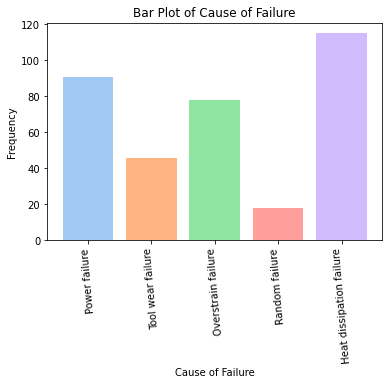

In [ ]:
categories = df["Cause of Failure"].unique()
counts = df["Cause of Failure"].value_counts()
colours = sns.color_palette('pastel')
# Remove a particular unique value (e.g., "No Failure")
exclude_value = "No failure"
categories = categories[categories != exclude_value]
counts = counts[categories]

graph.bar(categories, counts, color = colours)
graph.xlabel("Cause of Failure")
graph.ylabel("Frequency")
graph.title("Bar Plot of Cause of Failure")
graph.xticks(rotation=95)

graph.show()


# Deleting Unwanted Columns

In [ ]:
#Deleting Unwanted Columns
D_column = ['Product ID','HDF','PWF','OSF','RNF','TWF','Machine failure','UDI']
df1 = df.drop(columns=D_column)
df1.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Encoded Machine Failure,Cause of Failure
0,2,298.1,308.6,1551,42.8,0,0,No failure
1,1,298.2,308.7,1408,46.3,3,0,No failure
2,1,298.1,308.5,1498,49.4,5,0,No failure
3,1,298.2,308.6,1433,39.5,7,0,No failure
4,1,298.2,308.7,1408,40.0,9,0,No failure


# Correlation Analysis
This Shows that the Torque and Tool wear column has a higher correlation to the Encoded Machine Failure Column

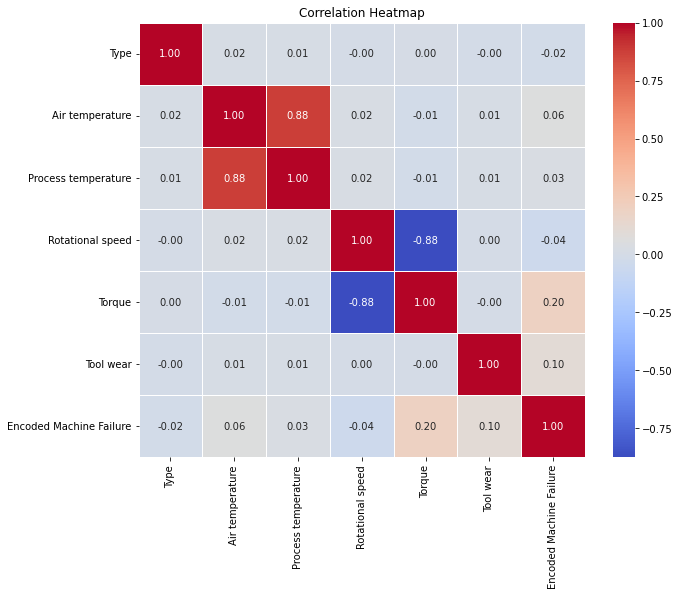

In [ ]:
#Compute the correlation matrix
correlation_matrix = df1.corr()
# Plot the correlation heatmap
plt.figure(figsize=(10, 8))  # Set the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Bivarient Analysis
The plot indicates a positive (direct) correlation, meaning both Air temperature and Process temperature  increases or decreases together

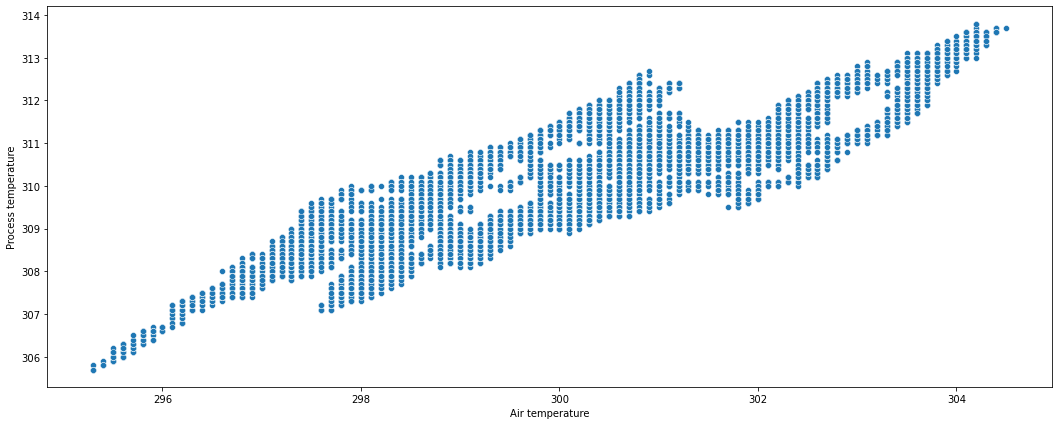

In [ ]:
graph.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Air temperature", y="Process temperature")
graph.show()

# Multivarient Analysis
This suggests a negative (inverse) correlation, where the Torque increases as the Rotational Speed decreases

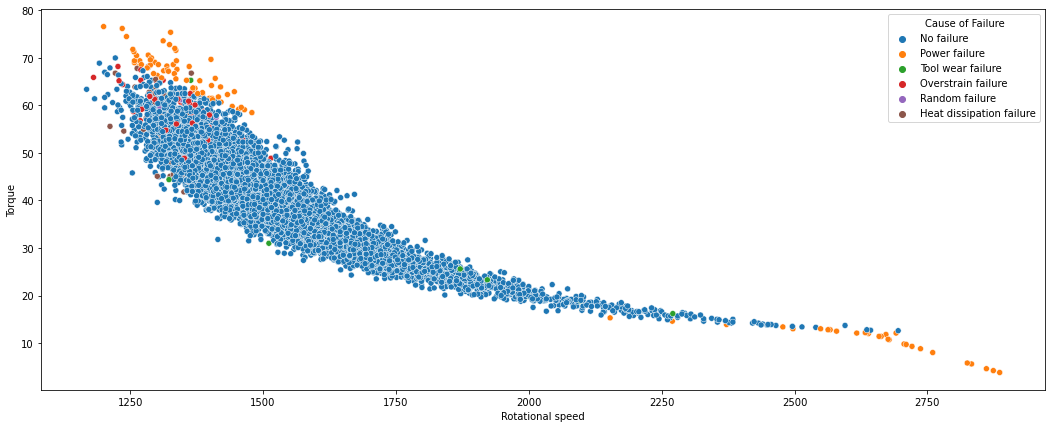

In [ ]:
graph.figure(figsize=(18,7))
sns.scatterplot(data=df1, x="Rotational speed", y="Torque", hue="Cause of Failure")
graph.show()

# Outliers

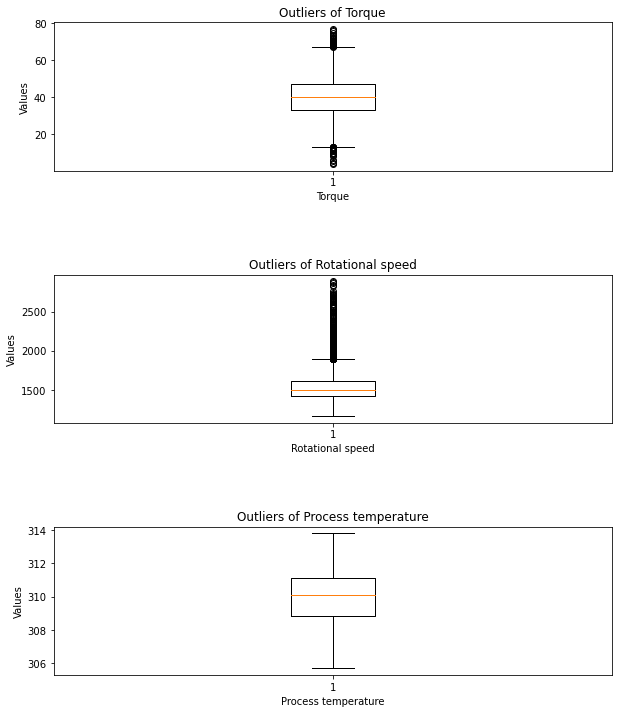

In [ ]:
# Selecting the Columns to check for outliers
selected_columns = ['Torque', 'Rotational speed', 'Process temperature']

# Create subplots for the selected columns
num_columns = len(selected_columns)
fig, axes = graph.subplots(nrows=num_columns, figsize=(10, 12))

# Iterate over the selected columns
for i, column in enumerate(selected_columns):
    # Create a box plot for the current column
    ax = axes[i] if num_columns > 1 else axes
    ax.boxplot(df1[column], vert=True)
    ax.set_title(f'Outliers of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Values')

# Adjust the spacing between subplots
graph.subplots_adjust(hspace=0.7)  # Increase the spacing between subplots

# Display the plot
graph.show()

# Deleting "Cause of Failure"

In [ ]:
# Deleting "Cause of Failure"
D_column = ["Cause of Failure"]
df1 = df1.drop(columns=D_column)
df1.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Encoded Machine Failure
0,2,298.1,308.6,1551,42.8,0,0
1,1,298.2,308.7,1408,46.3,3,0
2,1,298.1,308.5,1498,49.4,5,0
3,1,298.2,308.6,1433,39.5,7,0
4,1,298.2,308.7,1408,40.0,9,0


# Checking for Null values

In [ ]:
df1.isnull().sum()

Type                       0
Air temperature            0
Process temperature        0
Rotational speed           0
Torque                     0
Tool wear                  0
Encoded Machine Failure    0
dtype: int64

# Checking for Duplicate

In [ ]:
df1.duplicated().sum()

0

# Splitting the data into train and test

In [ ]:
T_rows = int(0.8*(len(df1)))
print("80% of the total Rows is", T_rows)

80% of the total Rows is 8000


In [ ]:
# Randomly select 80% of the rows for the initial training set
initial_train_df1 = df1.sample(n=T_rows, random_state=42)

# Select the remaining 20% of the rows for the test set
test_df1 = df1.drop(initial_train_df1.index)

In [ ]:
initial_train_df1.shape

(8000, 7)

In [ ]:
test_df1.shape

(2000, 7)

# Balancing the Encoded Machine Failure column for training

In [ ]:
a = initial_train_df1.drop('Encoded Machine Failure',axis=1)
b = initial_train_df1['Encoded Machine Failure']

In [ ]:
a.shape

(8000, 6)

In [ ]:
b.shape

(8000,)

In [ ]:
samp_df=SMOTETomek(random_state=37)
a_sample,b_sample=samp_df.fit_resample(a,b)

In [ ]:
print("Imbalanced EMF column", sorted(Counter(b).items()))
print("Balanced EMF column", sorted(Counter(b_sample).items()))

Imbalanced EMF column [(0, 7727), (1, 34), (2, 91), (3, 73), (4, 60), (5, 15)]
Balanced EMF column [(0, 7695), (1, 7723), (2, 7724), (3, 7718), (4, 7727), (5, 7711)]


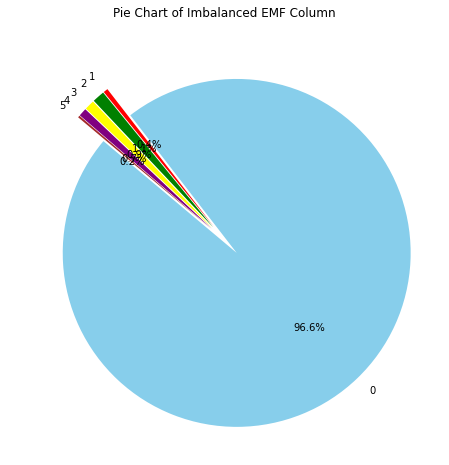

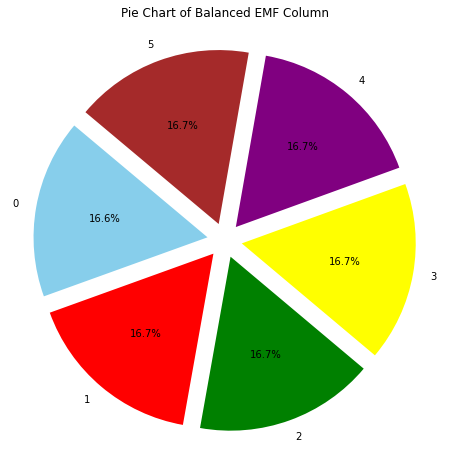

In [ ]:
Imbalanced_EMF_column = [(0, 7727), (1, 34), (2, 91), (3, 73), (4, 60), (5, 15)]
Balanced_EMF_column = [(0, 7695), (1, 7723), (2, 7724), (3, 7718), (4, 7727), (5, 7711)]


# Function to plot the pie chart
def plot_pie_chart(emf_data, title):
    emf_values = [item[0] for item in emf_data]
    emf_frequencies = [item[1] for item in emf_data]
    graph.pie(emf_frequencies, labels=emf_values, colors=('skyblue', 'red', 'green', 'yellow', 'purple', 'brown'), autopct='%1.1f%%', startangle=140,explode=[0.1, 0.1,0.1,0.1,0.1,0.1],)
    graph.title(title)
    graph.show()

# Create a larger figure to increase the size of the pie chart
graph.figure(figsize=(8, 8))
# Plotting the pie chart for the imbalanced EMF column
plot_pie_chart(Imbalanced_EMF_column, 'Pie Chart of Imbalanced EMF Column')


# Create a larger figure to increase the size of the pie chart
graph.figure(figsize=(8, 8))
# Plotting the pie chart for the balanced EMF column
plot_pie_chart(Balanced_EMF_column, 'Pie Chart of Balanced EMF Column')

In [ ]:
a_sample.shape

(46298, 6)

In [ ]:
b_sample.shape

(46298,)

In [ ]:
train_df1 = pd.concat([a_sample, b_sample], axis=1)

In [ ]:
train_df1.shape

(46298, 7)

In [ ]:
train_df1.duplicated().sum()

0

In [ ]:
train_df1.columns

Index(['Type', 'Air temperature', 'Process temperature', 'Rotational speed',
       'Torque', 'Tool wear', 'Encoded Machine Failure'],
      dtype='object')

# Selecting the Dependent and Independent Columns

In [ ]:
x_train=train_df1.iloc[:,:-1].values
y_train=train_df1.iloc[:,-1].values
x_test=test_df1.iloc[:,:-1].values
y_test=test_df1.iloc[:,-1].values

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_classifier(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred,average='macro')
    recall = recall_score(y_true, y_pred,average='macro')
    f1 = f1_score(y_true, y_pred,average='macro')

    evaluation_dict = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

    return evaluation_dict

In [ ]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Decision Tree Model

In [ ]:
decision = DecisionTreeClassifier()
decision.fit(x_train, y_train)
DT_predict = decision.predict(x_test)

In [ ]:
# Evaluate the DT classifier
evaluation_results = evaluate_classifier(y_test, DT_predict)

# Print the evaluation results
for metric, value in evaluation_results.items():
    print(f"{metric}: {value}")

Accuracy: 0.9375
Precision: 0.4950975840634016
Recall: 0.6187433862433863
F1 Score: 0.527847270139158


***Creating Confusion Matix for Decision Tree Model***

<Figure size 1080x1080 with 0 Axes>

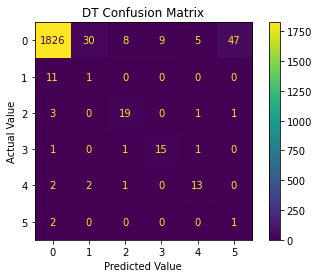

In [ ]:
# Create confusion matrix
cm = confusion_matrix(y_test, DT_predict)

# Define class labels
classes = ['0', '1', '2', '3', '4', '5']

# Set the figure size for the plot
plt.figure(figsize=(15, 15))

# Visualize the confusion matrix using a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='viridis', values_format='d')
plt.title('DT Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

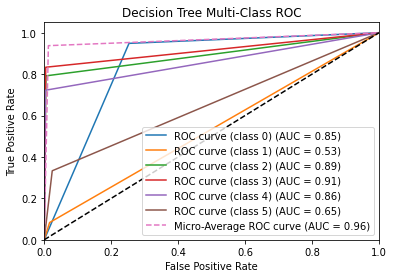

In [ ]:
# Predict probabilities for each class for test data
y_score = decision.predict_proba(x_test)

# Convert class labels to binary format
y_test_binary = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])

# Define the list of class labels
class_labels = [0, 1, 2, 3, 4, 5]

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr_micro, tpr_micro, _ = roc_curve(y_test_binary.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curves for each class
plt.figure()
for i in range(len(class_labels)):
    plt.plot(fpr[i], tpr[i], label='ROC curve (class %d) (AUC = %0.2f)' % (i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, label='Micro-Average ROC curve (AUC = %0.2f)' % roc_auc_micro, linestyle='--')

# Customize plot
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree Multi-Class ROC')
plt.legend(loc="lower right")
plt.show()


# Random Forest

In [ ]:
RF100 = RandomForestClassifier(n_estimators=100, random_state=42)
RF100.fit(x_train, y_train)
RF100_predict = RF100.predict(x_test)

# Evaluate the RF100 classifier
evaluation_results = evaluate_classifier(y_test, RF100_predict)

# Print the evaluation results
for metric, value in evaluation_results.items():
    print(f"{metric}: {value}")

Accuracy: 0.974
Precision: 0.6496422626769981
Recall: 0.7259632034632034
F1 Score: 0.6834279808012166


In [ ]:
RF100_predict[:60]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

***Creating Confusion Matix for Random Forest Model***

<Figure size 1080x1080 with 0 Axes>

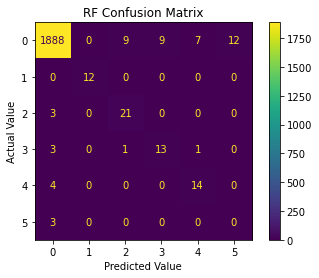

In [ ]:
# Create confusion matrix
cm = confusion_matrix(y_test, RF100_predict)

# Define class labels
classes = ['0', '1', '2', '3', '4', '5']

# Set the figure size for the plot
plt.figure(figsize=(15, 15))

# Visualize the confusion matrix using a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='viridis', values_format='d')
plt.title('RF Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

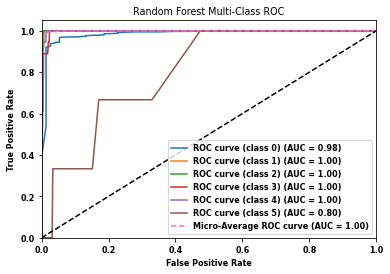

In [ ]:
# Predict probabilities for each class for test data
y_score = RF100.predict_proba(x_test)

# Convert class labels to binary format
y_test_binary = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])

# Define the list of class labels
class_labels = [0, 1, 2, 3, 4, 5]

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr_micro, tpr_micro, _ = roc_curve(y_test_binary.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curves for each class
plt.figure()
for i in range(len(class_labels)):
    plt.plot(fpr[i], tpr[i], label='ROC curve (class %d) (AUC = %0.2f)' % (i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, label='Micro-Average ROC curve (AUC = %0.2f)' % roc_auc_micro, linestyle='--')

# Customize plot
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Multi-Class ROC')
plt.legend(loc="lower right")
plt.show()

# XGBOOST

In [ ]:
# Create the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(n_estimators=1000, random_state=42)

# Train the XGBoost classifier
xgb_classifier.fit(x_train, y_train)

# Make predictions on the test data
xgb_predictions = xgb_classifier.predict(x_test)

# Evaluate the xgb classifier
evaluation_results = evaluate_classifier(y_test, xgb_predictions)

# Print the evaluation results For XGBoost
for metric, value in evaluation_results.items():
    print(f"{metric}: {value}")

Accuracy: 0.988
Precision: 0.6930353524074211
Recall: 0.7441582491582492
F1 Score: 0.7167986181104956


***Creating Confusion Matix for XGboost Model***

<Figure size 1080x1080 with 0 Axes>

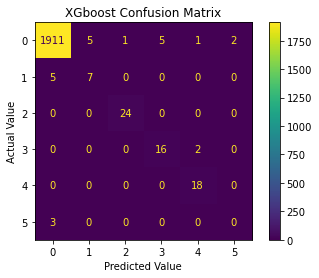

In [ ]:
# Create confusion matrix
cm = confusion_matrix(y_test, xgb_predictions)

# Define class labels
classes = ['0', '1', '2', '3', '4', '5']

# Set the figure size for the plot
plt.figure(figsize=(15, 15))

# Visualize the confusion matrix using a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='viridis', values_format='d')
plt.title('XGboost Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

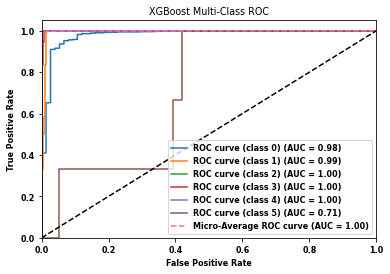

In [ ]:
# Predict probabilities for each class for test data
y_score = xgb_classifier.predict_proba(x_test)

# Convert class labels to binary format
y_test_binary = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])

# Define the list of class labels
class_labels = [0, 1, 2, 3, 4, 5]

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr_micro, tpr_micro, _ = roc_curve(y_test_binary.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curves for each class
plt.figure()
for i in range(len(class_labels)):
    plt.plot(fpr[i], tpr[i], label='ROC curve (class %d) (AUC = %0.2f)' % (i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, label='Micro-Average ROC curve (AUC = %0.2f)' % roc_auc_micro, linestyle='--')

# Customize plot
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Multi-Class ROC')
plt.legend(loc="lower right")
plt.show()


# Create the ANN classifier

In [ ]:
# Create the ANN classifier
ann_classifier = MLPClassifier(max_iter=100, random_state=42)

# Train the ANN classifier
ann_classifier.fit(x_train, y_train)

# Make predictions on the test data
ann_predictions = ann_classifier.predict(x_test)

# Evaluate the ANN classifier
evaluation_results = evaluate_classifier(y_test, ann_predictions)

# Print the evaluation results for ANN
for metric, value in evaluation_results.items():
    print(f"{metric}: {value}")

Accuracy: 0.7325
Precision: 0.37792936978058056
Recall: 0.6862866762866763
F1 Score: 0.4073368792213226


***Creating Confusion Matix for ANN Model***

<Figure size 1080x1080 with 0 Axes>

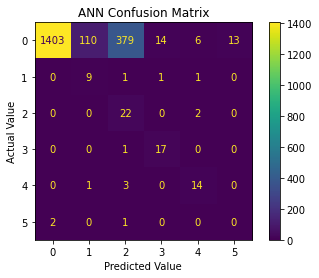

In [ ]:
# Create confusion matrix
cm = confusion_matrix(y_test, ann_predictions)

# Define class labels
classes = ['0', '1', '2', '3', '4', '5']

# Set the figure size for the plot
plt.figure(figsize=(15, 15))

# Visualize the confusion matrix using a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='viridis', values_format='d')
plt.title('ANN Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

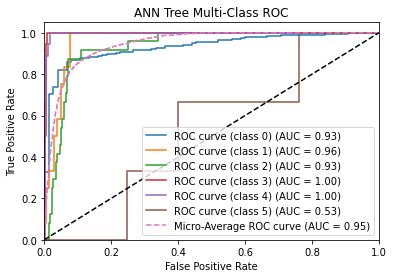

In [ ]:
# Predict probabilities for each class for test data
y_score = ann_classifier.predict_proba(x_test)

# Convert class labels to binary format
y_test_binary = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])

# Define the list of class labels
class_labels = [0, 1, 2, 3, 4, 5]

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr_micro, tpr_micro, _ = roc_curve(y_test_binary.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curves for each class
plt.figure()
for i in range(len(class_labels)):
    plt.plot(fpr[i], tpr[i], label='ROC curve (class %d) (AUC = %0.2f)' % (i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, label='Micro-Average ROC curve (AUC = %0.2f)' % roc_auc_micro, linestyle='--')

# Customize plot
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ANN Tree Multi-Class ROC')
plt.legend(loc="lower right")
plt.show()

# Creating a Hybrid of Random Forest and XGBoost

In [ ]:
#Train Random Forest and XGBoost models on the training data
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)

# Create the ensemble classifier using voting='hard'
ensemble_classifier = VotingClassifier(
    estimators=[('xgb', xgb_classifier), ('rf', rf_classifier)],
    voting='soft'
)

# Train the individual classifiers
rf_classifier.fit(x_train, y_train)
xgb_classifier.fit(x_train, y_train)
# Train the ensemble classifier
ensemble_classifier.fit(x_train, y_train)

# Make predictions on the test data using ensemble model
ensemble_predictions = ensemble_classifier.predict(x_test)

# Evaluate the ensemble_classifier
evaluation_results = evaluate_classifier(y_test, ensemble_predictions)

# Hybrid evaluation results
for metric, value in evaluation_results.items():
    print(f"{metric}: {value}")

Accuracy: 0.9885
Precision: 0.7581298282868963
Recall: 0.8132563732563733
F1 Score: 0.7836487568334133


***Creating Confusion Matix for the Hybrid Model***

<Figure size 1080x1080 with 0 Axes>

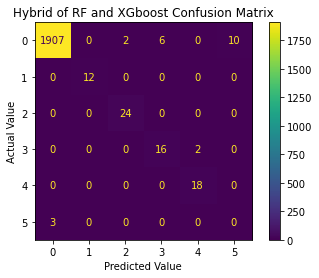

In [ ]:
# Create confusion matrix
cm = confusion_matrix(y_test, ensemble_predictions)

# Define class labels
classes = ['0', '1', '2', '3', '4', '5']

# Set the figure size for the plot
plt.figure(figsize=(15, 15))

# Visualize the confusion matrix using a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='viridis', values_format='d')
plt.title('Hybrid of RF and XGboost Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [ ]:
# Create the ensemble classifier using voting='hard'
ensemble_classifier = VotingClassifier(
    estimators=[('xgb', xgb_classifier), ('rf', rf_classifier)],
    voting='soft'
)

ensemble_classifier.fit(x_train, y_train)

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_t

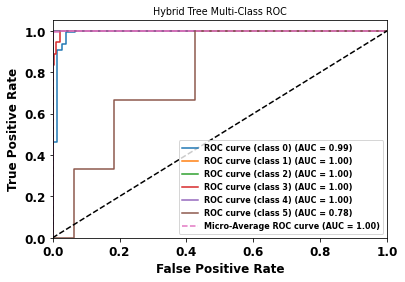

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
# Predict probabilities for each class for test data
y_score = ensemble_classifier.predict_proba(x_test)

# Convert class labels to binary format
y_test_binary = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])

# Define the list of class labels
class_labels = [0, 1, 2, 3, 4, 5]

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binary[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr_micro, tpr_micro, _ = roc_curve(y_test_binary.ravel(), y_score.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)

# Plot ROC curves for each class
plt.figure()
for i in range(len(class_labels)):
    plt.plot(fpr[i], tpr[i], label='ROC curve (class %d) (AUC = %0.2f)' % (i, roc_auc[i]))

# Plot micro-average ROC curve
plt.plot(fpr_micro, tpr_micro, label='Micro-Average ROC curve (AUC = %0.2f)' % roc_auc_micro, linestyle='--')

# Set font size and style
plt.rc('font', size=8)
plt.rc('axes')

# Customize plot
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Hybrid Tree Multi-Class ROC')
plt.legend(loc="lower right")
plt.show()

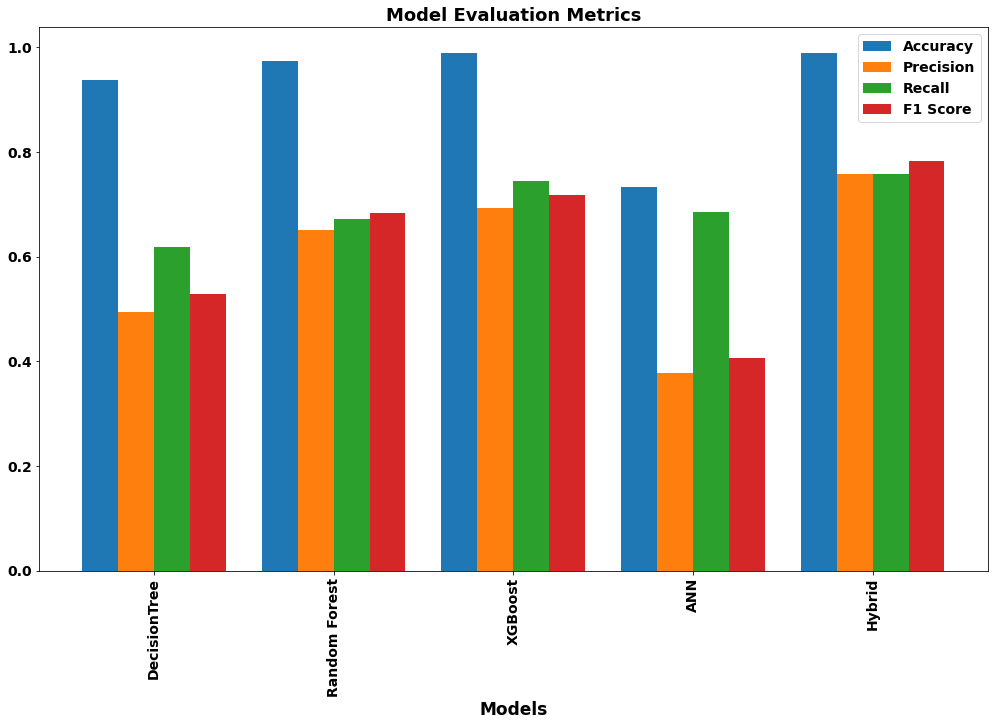

In [ ]:
models = ['DecisionTree', 'Random Forest', 'XGBoost', 'ANN', 'Hybrid']
accuracy = [0.938, 0.974, 0.988, 0.733, 0.989]
precision = [0.495, 0.65, 0.693, 0.378, 0.758]
recall = [0.619, 0.6726, 0.744, 0.686, 0.758]
f1_score = [0.528, 0.683, 0.717, 0.407, 0.783]

# Bar positions
x = list(range(len(models)))


# Increase the figure size
fig, ax = plt.subplots(figsize=(17, 10))
# Bar width
width = 0.2

# Plot the bars
rects1 = ax.bar(x, accuracy, width, label='Accuracy')
rects2 = ax.bar([pos + width for pos in x], precision, width, label='Precision')
rects3 = ax.bar([pos + width * 2 for pos in x], recall, width, label='Recall')
rects4 = ax.bar([pos + width * 3 for pos in x], f1_score, width, label='F1 Score')

# Set font size and style
plt.rc('font', weight='bold', size=14)
plt.rc('axes', labelweight='bold')

# Set the x-axis labels and title
ax.set_xticks([pos + width * 1.5 for pos in x])
ax.set_xticklabels(models, rotation=90,fontsize=14)
ax.set_xlabel('Models',fontsize=17)
ax.set_title('Model Evaluation Metrics',weight='bold',fontsize=18)

# Add a legend
ax.legend()

# Show the plot
plt.show()